In [643]:
import pandas as pd
import matplotlib.pyplot as plt

In [644]:
pd.set_option('display.max_rows',None)
df = pd.read_csv('food_coded.csv')
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [645]:
df.isna().sum()

GPA                              2
Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food                     1
comfort_food_reasons             1
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         17
diet_current                     1
diet_current_coded               0
drink                            2
eating_changes                   3
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                        13
father_education                 1
father_profession                3
fav_cuisine                      2
fav_cuisine_coded                0
fav_food                         2
food_childhood      

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

# Removing String From Number in GPA coloumn

In [647]:
GPA_extract = df['GPA'].str.extract('(\d+(\.\d*)?)')
df['GPA'] = GPA_extract[0].fillna('0')
df['GPA'] = df['GPA'].astype(float)
df['GPA'] = df['GPA'].apply(lambda x: round(x, 1))

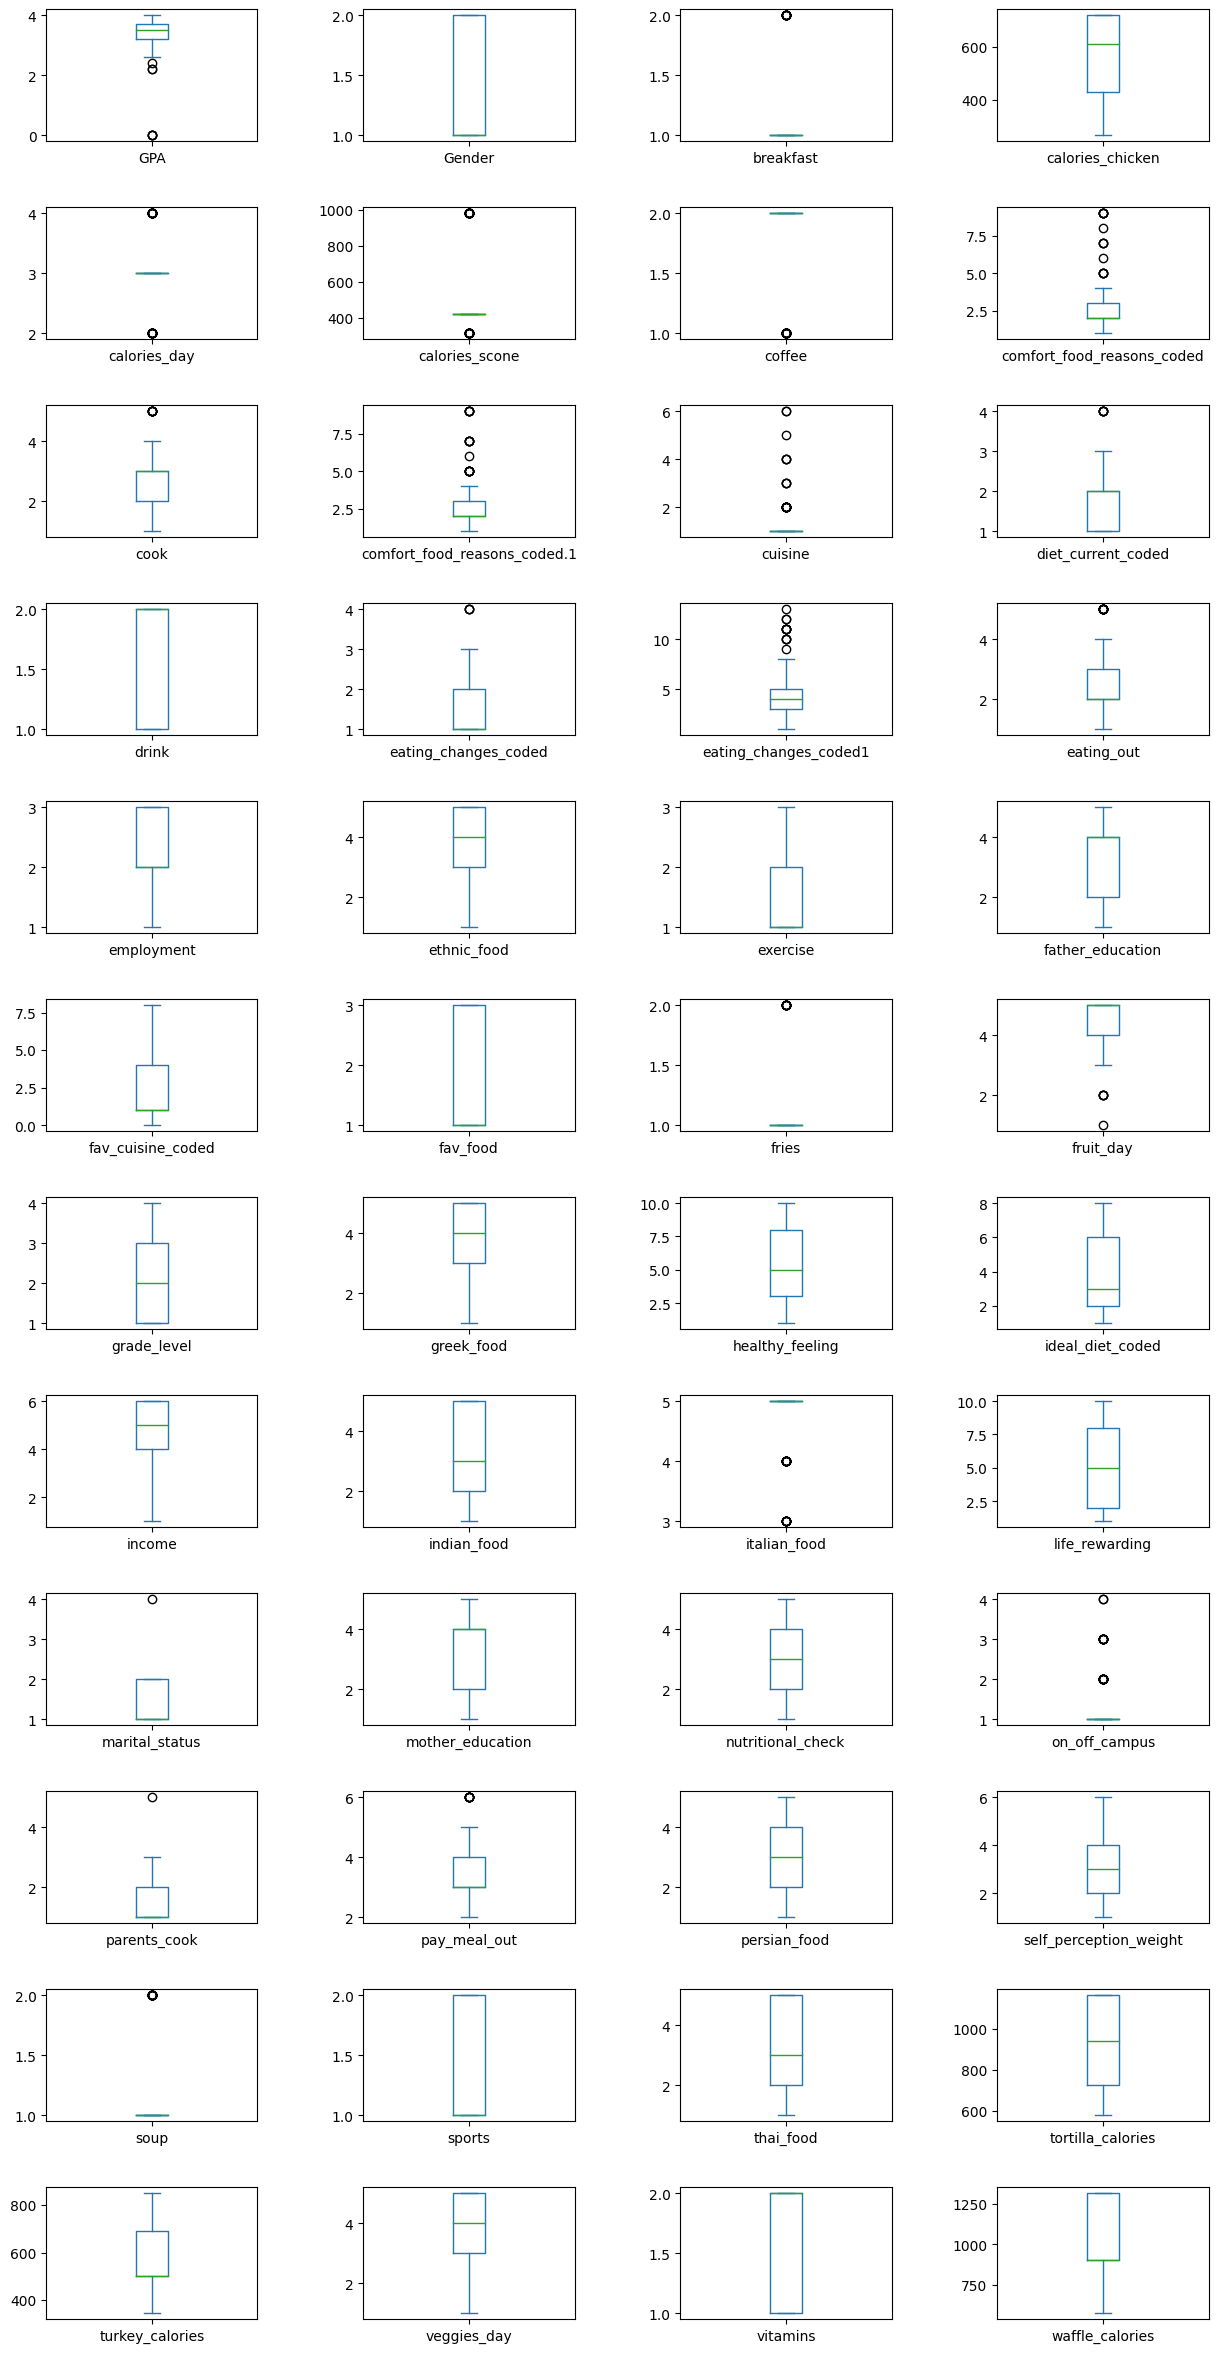

In [648]:
df.plot(subplots=True, layout=(12,4), kind='box', figsize=(15, 30))
plt.subplots_adjust(wspace=0.5, hspace=0.5);

In [649]:
df['calories_day'] = df['calories_day'].fillna(df['calories_day'].median())


In [650]:
df['calories_scone'] = df['calories_scone'].fillna(df['calories_scone'].median())

In [651]:
df['comfort_food_reasons'] = df['comfort_food_reasons'].dropna()

In [652]:
df = df.dropna(subset = ['comfort_food', 'comfort_food_reasons','cuisine', 'diet_current', 'drink', 'eating_changes','father_education', 'father_profession', 'fav_cuisine', 'fav_food', 'food_childhood', 'healthy_meal','ideal_diet','marital_status','meals_dinner_friend','mother_education','mother_profession','on_off_campus','type_sports','weight']).reset_index(drop=True)

In [653]:
df['comfort_food_reasons_coded'] = df['comfort_food_reasons_coded'].fillna(9)

In [654]:
df['cook'] = df['cook'].fillna(5)

In [655]:
df['employment'] = df['employment'].fillna(4)

In [656]:
df['life_rewarding'] = df['life_rewarding'].fillna(df['life_rewarding'].median())

In [657]:
df['persian_food'] = df['persian_food'].fillna(3)

In [658]:
df['exercise'] = df['exercise'].fillna(5)

In [659]:
df['sports'] = df['sports'].fillna(99)

In [660]:
df['tortilla_calories'] = df['tortilla_calories'].fillna(df['tortilla_calories'].median())

In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           83 non-null     float64
 1   Gender                        83 non-null     int64  
 2   breakfast                     83 non-null     int64  
 3   calories_chicken              83 non-null     int64  
 4   calories_day                  83 non-null     float64
 5   calories_scone                83 non-null     float64
 6   coffee                        83 non-null     int64  
 7   comfort_food                  83 non-null     object 
 8   comfort_food_reasons          83 non-null     object 
 9   comfort_food_reasons_coded    83 non-null     float64
 10  cook                          83 non-null     float64
 11  comfort_food_reasons_coded.1  83 non-null     int64  
 12  cuisine                       83 non-null     float64
 13  diet_cu

In [662]:
Weight_extract = df['weight'].str.extract('(\d+(\.\d*)?)')
df['weight'] = Weight_extract[0].fillna('0')
df['weight'] = df['weight'].astype(int)

In [663]:
df.drop(df[df['weight'] == 0].index, inplace = True)
df = df.reset_index(drop=True)

In [664]:
df.drop(df[df['GPA'] == 0].index, inplace = True)


In [665]:
df = df.reset_index(drop=True)

In [666]:
df.to_csv('Food Clean.csv', index=False)